In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [96]:
crime = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv")


In [97]:
crime.columns = ["city", "population","Violent crime","Murder","Rape (revised)","Rape (legacy)"
                 ,"Robbery","Aggravated assault","Property crime","Burglary","Larceny-theft","Motor vehicle theft","Arson3"]

In [98]:
# I reviewed the dataframe and saw some bad rows; I dropped them here:
crime = crime.drop([0,1,2,3,352,353,354])
crime.head()

,city,population,Violent crime,Murder,Rape (revised),Rape (legacy),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [99]:
# Need to see how I can work with these columns
crime.dtypes

city                   object
population             object
Violent crime          object
Murder                 object
Rape (revised)         object
Rape (legacy)          object
Robbery                object
Aggravated assault     object
Property crime         object
Burglary               object
Larceny-theft          object
Motor vehicle theft    object
Arson3                 object
dtype: object

In [100]:
# I tried to make these into numerics but the commas are causing a problem, so I removing them.
crime['Murder'] = crime['Murder'].str.replace(',', '')
crime['Robbery'] = crime['Robbery'].str.replace(',', '')
crime['population'] = crime['population'].str.replace(',', '')

In [101]:
#Now, I can make these fiels numeric
crime[['Murder','Robbery','population']] = crime[['Murder','Robbery','population']].apply(pd.to_numeric)

In [102]:
#Checking
crime.dtypes

city                   object
population              int64
Violent crime          object
Murder                  int64
Rape (revised)         object
Rape (legacy)          object
Robbery                 int64
Aggravated assault     object
Property crime         object
Burglary               object
Larceny-theft          object
Motor vehicle theft    object
Arson3                 object
dtype: object

In [122]:
#create the population squared column
crime['popsqrd'] = crime['population'] *  crime['population']

In [123]:
crime[['city','Murder','Robbery','population','popsqrd']].head()

,city,Murder,Robbery,population,popsqrd
4,Adams Village,0,0,1861,3463321
5,Addison Town and Village,0,0,2577,6640929
6,Akron Village,0,0,2846,8099716
7,Albany,8,227,97956,9595377936
8,Albion Village,0,4,6388,40806544


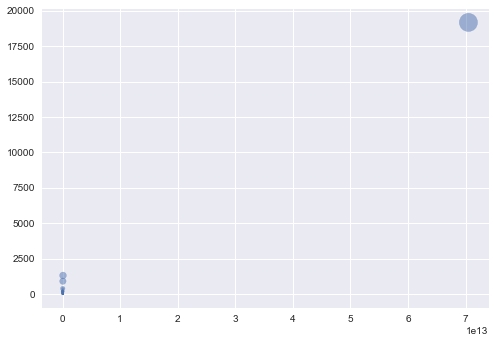

In [124]:
x = crime['popsqrd']
y = crime['Robbery']
#colors = crime['city']
area = crime['Murder']

#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.scatter(x, y, s=area, alpha=0.5)
plt.show()

In [125]:
# there is a really big city in there, let me find it:
big_city = crime.query('population > 800000')
print(big_city)

         city  population Violent crime  Murder Rape (revised) Rape (legacy)  \
220  New York     8396126        52,384     335            NaN         1,112   

     Robbery Aggravated assault Property crime Burglary Larceny-theft  \
220    19170             31,767        141,971   16,606       117,931   

    Motor vehicle theft Arson3         popsqrd  
220               7,434    NaN  70494931807876  


In [126]:
# Hmmm, NYC is in here...maybe remove it as an outlier?

In [163]:
crime_filter = crime.query('popsqrd < 1000000000')
print(crime.shape)
crime_filter.shape

(348, 14)


(306, 14)

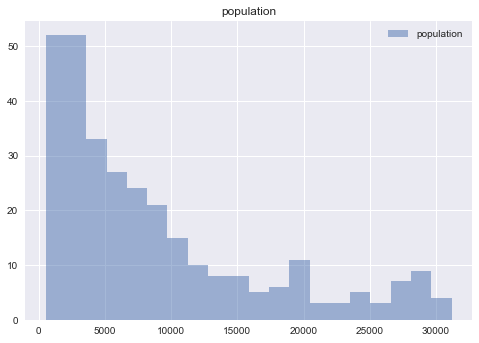

In [172]:
# Look at the histogram of populations w/o "big cities"

plt.hist(crime_filter['population'], label = 'population', alpha = 0.5, bins = 20)
plt.title('population')
plt.legend(loc='best')
plt.show()

In [170]:
#which cities am I removing?
big_city = crime.query('popsqrd >= 1000000000')
big_city.head(10)

,city,population,Violent crime,Murder,Rape (revised),Rape (legacy),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3,popsqrd
7,Albany,97956,791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN,9595377936
11,Amherst Town,118296,107,1,NaN,7,31,68,"2,118",204,"1,882",32,3,13993943616
25,Bethlehem Town,34243,13,0,NaN,0,3,10,442,50,388,4,NaN,1172583049
26,Binghamton,46304,284,3,NaN,19,101,161,"2,349",525,"1,767",57,NaN,2144060416
35,Brighton Town,36689,26,1,NaN,2,10,13,793,142,623,28,NaN,1346082721
39,Buffalo,258789,"3,249",47,NaN,145,1322,"1,735","12,491","3,458","8,076",957,NaN,66971746521
49,Carmel Town,34462,10,0,NaN,2,0,8,198,31,158,9,1,1187629444
57,Cheektowaga Town,78361,158,0,NaN,11,48,99,"2,689",345,"2,271",73,2,6140446321
61,Clarkstown Town,80705,65,0,NaN,8,17,40,"1,515",99,"1,388",28,NaN,6513297025
66,Colonie Town,78215,63,0,NaN,0,31,32,"1,990",186,"1,753",51,10,6117586225


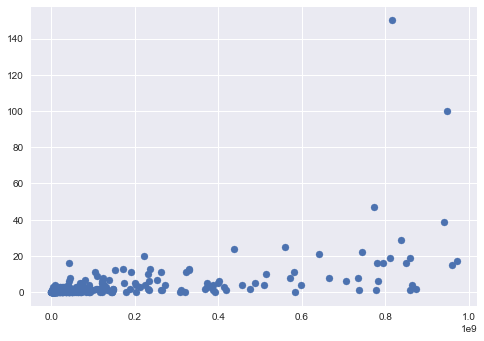

In [173]:
x = crime_filter['popsqrd']
y = crime_filter['Robbery']
#colors = crime['city']
#area = crime_filter['Murder']

#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.scatter(x, y, alpha=1)
plt.show()

I may want to remove some of the outliers here (100 or 140 robberies) however since these are going to turn into categorical variables, it may not be worth it.

Formula:Propertycrime=α+Population+Population2+Murder+Robbery 

For Murder & Robbery, use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.

In [176]:
#Translate the two continuous variables into categorical
crime['Murder'] = np.where((crime['Murder'] > 0),1,0)
crime['Robbery'] = np.where((crime['Robbery'] > 0),1,0)

In [177]:
# make this df smaller to just the columns I need
crime_sub = crime[['population','Murder','Robbery']]
crime_sub.head()

,population,Murder,Robbery
4,1861,0,0
5,2577,0,0
6,2846,0,0
7,97956,1,1
8,6388,0,1


In [178]:
crime_sub.dtypes

population    int64
Murder        int32
Robbery       int32
dtype: object

In [179]:
#create the population squared column
crime_sub['popsqrd'] = crime_sub['population'] *  crime_sub['population']

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
